# Quantitative Analysis of Price & Daily Returns

#### - Can returns be described with a normal distribution?
#### - Is daily change non-zero?
#### - Can price movement be described as a random walk?

## 1. Set up environment

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr

## 2 & 3. Download stock price data, store in dataframe and look at data

In [172]:
amzn = pdr.get_data_yahoo('AMZN')
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-01,58.982498,57.599998,58.602501,58.117500,82142000.0,58.117500
2017-12-04,58.759998,56.400002,58.692501,56.697498,118638000.0,56.697498
2017-12-05,57.963501,56.237000,56.412998,57.078499,81596000.0,57.078499
2017-12-06,57.794498,56.804001,56.899502,57.617500,57066000.0,57.617500
2017-12-07,58.159500,57.549999,57.829498,57.989498,50232000.0,57.989498


## 4. Store instantaneous rate of return in separate series

In [173]:
amzn_close = amzn['Close']
amzn_return = round(np.log(amzn_close).diff() * 100, 2)
amzn_return.head()

Date
2017-12-01     NaN
2017-12-04   -2.47
2017-12-05    0.67
2017-12-06    0.94
2017-12-07    0.64
Name: Close, dtype: float64

## 5. Plot the data

<AxesSubplot: xlabel='Date'>

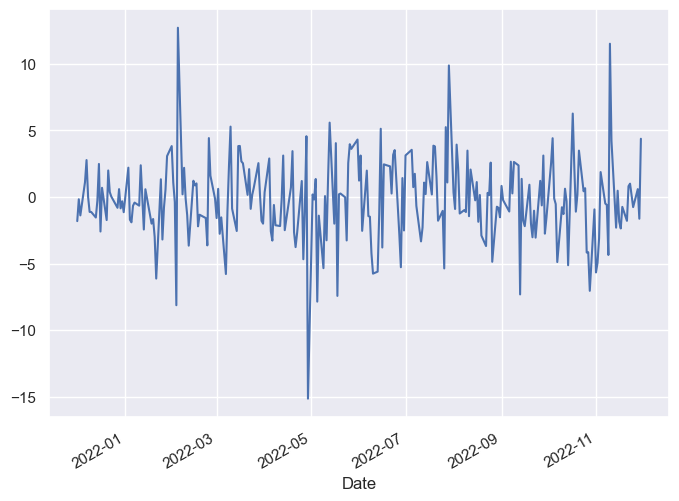

In [174]:
amzn_return[-252:].plot()

## 6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them

In [175]:
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    1257.000000
mean        0.040398
std         2.242865
min       -15.140000
25%        -1.000000
50%         0.130000
75%         1.130000
max        12.690000
Name: Close, dtype: float64

## 7. An alternative more slightly different table of descriptives from scipy stats

In [176]:
from scipy import stats

In [177]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

## 8 & 9. For comparision generate random numbers that follow normal distribution

In [178]:
from scipy.stats import norm

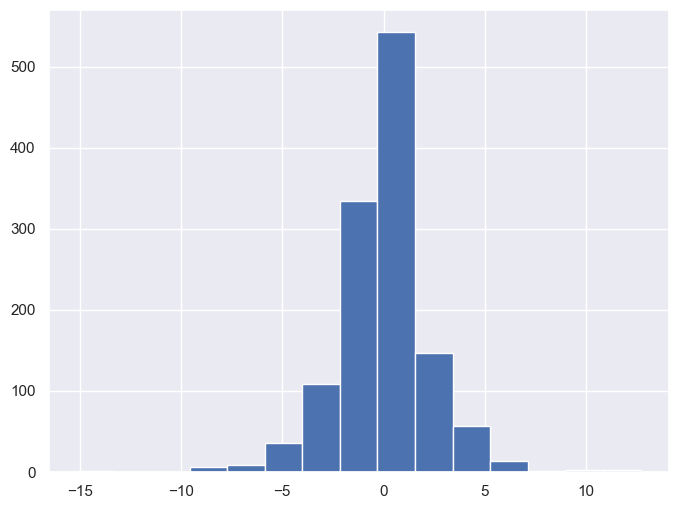

In [179]:
plt.hist(amzn_return, bins = 15);

In [180]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

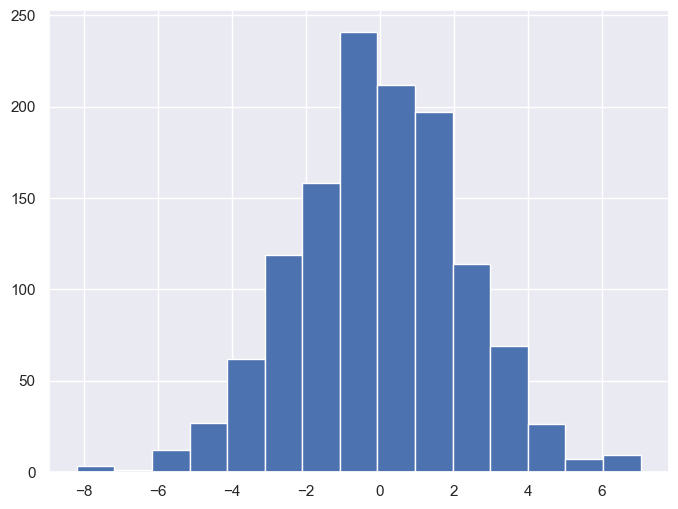

In [181]:
plt.hist(x, bins = 15);

# Is price change normally distributed?(No)

## 10. Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [182]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             1.27          0.2043
AMZN:         11.36          0.0000


## 11. plot histogram of price changes with normal curve overlay

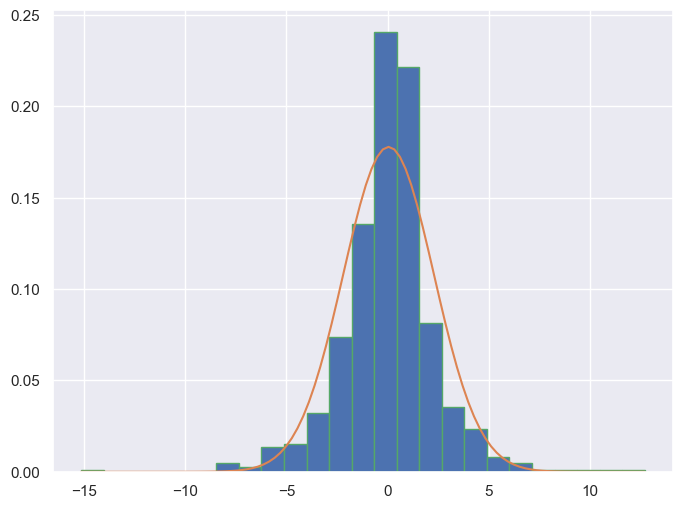

In [183]:
plt.hist(amzn_return, bins = 25, edgecolor = 'g', density = True)
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));


## 12. Compare normally distributed sample with same attributes as amzn price change

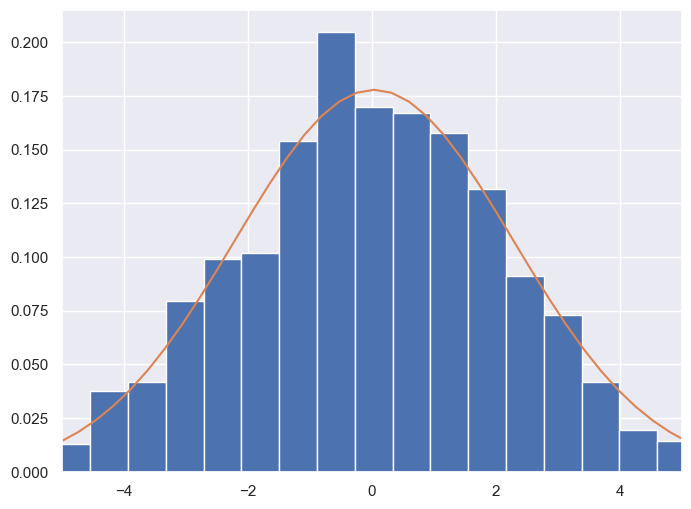

In [184]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

# Is daily price change significantly different from zero?

## 13. Conduct simple hypothesis test

In [185]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative = 'two-sided')

Ttest_1sampResult(statistic=-0.9026962666436494, pvalue=0.3675525739509097)

# Can price movement be described as a random walk?

## 14. Create price lags

In [186]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2017-12-05,57.078499,56.697498,58.117500
2017-12-06,57.617500,57.078499,56.697498
2017-12-07,57.989498,57.617500,57.078499
2017-12-08,58.099998,57.989498,57.617500
2017-12-11,58.445999,58.099998,57.989498


## 15. Fit linear model

In [187]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [188]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [189]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2017-12-05,57.078499,56.697498,58.117500,56.721519
2017-12-06,57.617500,57.078499,56.697498,57.066640
2017-12-07,57.989498,57.617500,57.078499,57.602456
2017-12-08,58.099998,57.989498,57.617500,57.977750
2017-12-11,58.445999,58.099998,57.989498,58.093448


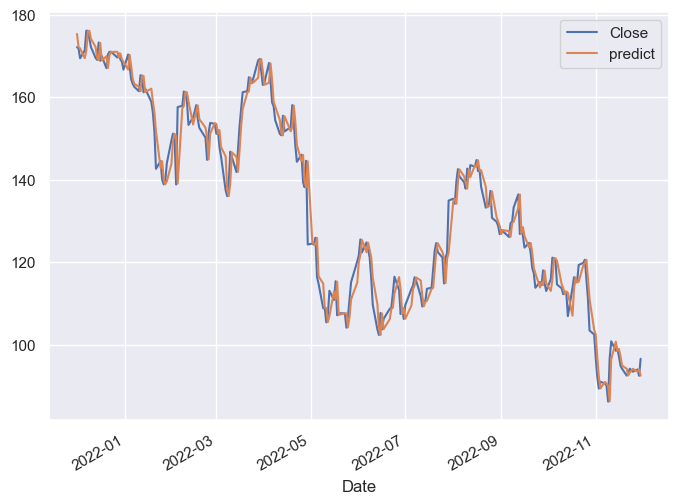

In [190]:
amzn_close.iloc[-252:][['Close', 'predict']].plot();